# Solutions for HW #4
Below I have included solutions to most of the problems in HW4. I have omitted (for the time) a discussion about techniques for problem 8 until you have a chance to think about it some more.

---
## Question 1
Here we just wanted you to get your bearings -- load up the data and poke around a little to see how to access the data points.

In [1]:
import numpy as np

A = np.loadtxt('band.txt')

print('First five entries:')
for i in range(5):
    print('Index %d => %s' % (i,A[i]))
    
print('\nLast five entries:')
for i in range(5):
    print('Index %d => %s' % (len(A)-i-1,A[len(A)-i-1]))

First five entries:
Index 0 => [-8507.06  3404.24]
Index 1 => [-5685.17  2603.52]
Index 2 => [-5602.95  2216.59]
Index 3 => [-7909.28  2940.71]
Index 4 => [-8421.26  2580.03]

Last five entries:
Index 127 => [-6194.43  2749.99]
Index 126 => [-5400.52  2707.84]
Index 125 => [-5220.18  2746.55]
Index 124 => [-6626.97  2498.48]
Index 123 => [-5468.21  2891.63]


---
## Question 2

In [2]:
print('The length of A is %d.' % len(A))
print('The type of A is %s.' % type(A))

The length of A is 128.
The type of A is <class 'numpy.ndarray'>.


This gives you all you need to know to look up what this is! A quick search will get you the [NumPy documentation page](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) for an ndarray. What I was looking for here was something along the lines of "a multidimensional array" ideally with a little more detail.

One thing to notice about ndarrays is that (looking at the documentation page) there are a ton of built-in methods that aid in computation! 

---
## Question 3
To do this, we should write a couple functions that we will be using over and over

In [3]:
import math

# Compute the distance between two points
def dist(x,y):
    return math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

# Compute the length of a path given a list of points
# NOTE: Does NOT return to the start again
def pathLen(lst):
    # Define a variable to accumulate the distances
    total = 0
    # Avoid an index-out-of-range error since we will be comparing to the *next* entry
    for i in range(len(lst)-1):
        total += dist(lst[i], lst[i+1])
    return total

# Compute the cycle length of a given list of indicies
def cycleLen(lst):
    return dist(lst[0], lst[-1]) + pathLen(lst)

Then it's just a matter of calling our functions:

In [4]:
print('The length of visiting the first five cities in order is %f.' % pathLen(A[:5]))
print('The length of visiting all cities in order is %f.' % pathLen(A))

The length of visiting the first five cities in order is 6372.467933.
The length of visiting all cities in order is 171276.085681.


---
## Question 4
Oh! Time to define another function or two we can reuse

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Just plot the points
def plotPoints(xs, ys, ax1, labelPoints=False):
    ax1.scatter(xs,ys,color='red')
    # Plot the points on top for clarity
    if labelPoints:
        for i in range(len(xs)-1):
            ax1.annotate(i, (xs[i],ys[i]))

# Just plot the path
def plotPath(xs, ys, ax1, returnHome=True):
    # If 'returnHome' is selected, add in the first point at the end of the lists
    if returnHome:
        xs.append(xs[0])
        ys.append(ys[0])
    # Plot the solution
    ax1.plot(xs,ys)
    
# Wrapper function that gives us a single interface for all our graphing needs
def plot(lst, showPoints=True, showPath=True, returnHome=True, labelPoints=False):
    # Create the figure to manipulate
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    # We don't really care about coordinates in our visualizations
    ax1.axes.get_yaxis().set_ticks([])
    ax1.axes.get_xaxis().set_ticks([])
    
    # Points representing the cities in the order of lst
    xs = [elem[0] for elem in lst]
    ys = [elem[1] for elem in lst]
    
    # Call the appropriate methods
    if showPath:
        plotPath(xs, ys, ax1, returnHome)
    if showPoints:
        plotPoints(xs, ys, ax1, labelPoints)

And once again our job becomes easier:

<IPython.core.display.Javascript object>


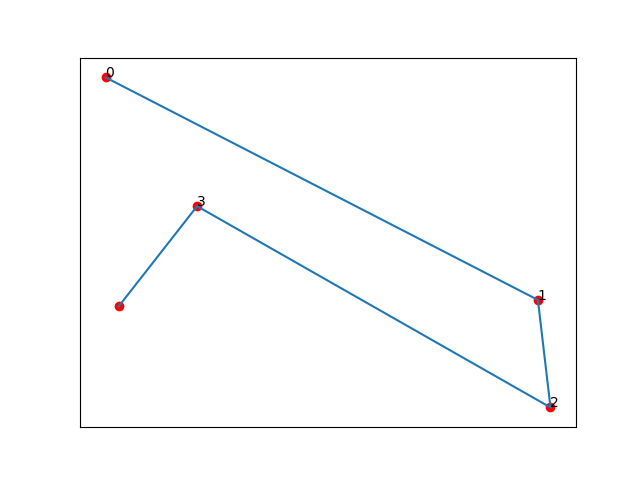

In [6]:
plot(A[:5], returnHome=False, labelPoints=True)

Just eyeballing this, it would be nice if we could avoid taking those long paths across. Let's try a new path:

<IPython.core.display.Javascript object>


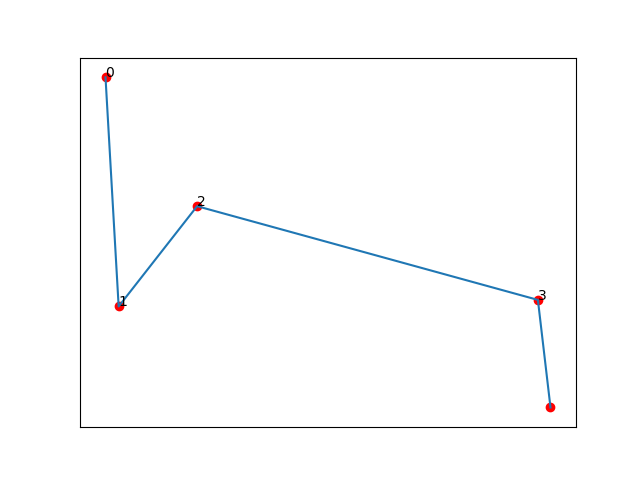

The new path has length 4100.027496.


In [7]:
indexPath = [0,4,3,1,2]
newPath = [A[i] for i in indexPath]

plot(newPath, returnHome=False, labelPoints=True)
print("The new path has length %f." % pathLen(newPath))

We can see this is clearly shorter than the original (by almost 2000 units).

---
## Question 5
Let's quickly plot the points for the whole country:

<IPython.core.display.Javascript object>


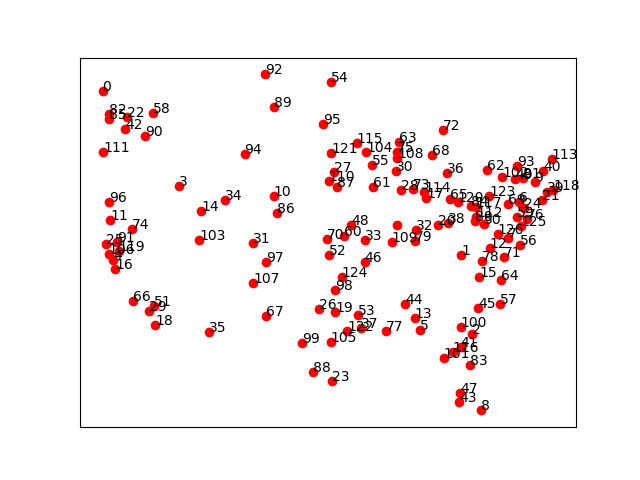

In [8]:
plot(A, labelPoints=True, showPath=False)

<IPython.core.display.Javascript object>


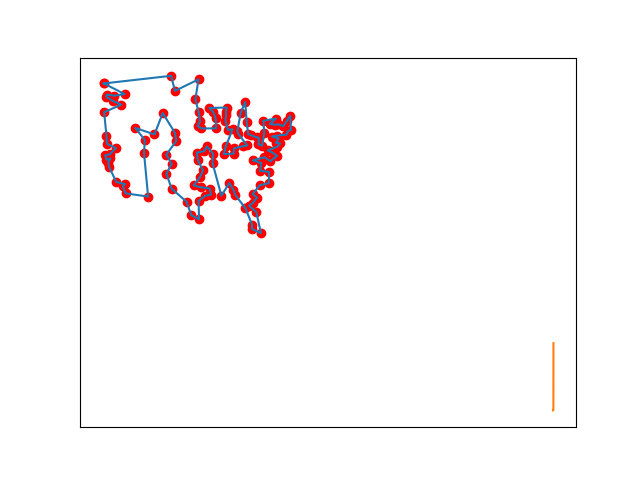

This plot has length 19737.149640.


In [9]:
byEyeIndicies = [0,58,22,82,85,42,90,111,96,11,74,91,25,106,119,4,16,66,51,29,18,35,
        103,14,3,34,94,10,86,31,97,107,67,99,88,23,105,122,37,53,19,26,98,124,52,70,60,48,33,46,
        77,44,13,5,101,47,43,8,83,116,41,2,100,45,57,64,15,78,1,12,71,56,7,126,125,76,59,24,69,
        6,21,39,118,113,40,9,81,49,102,93,62,123,50,80,112,117,84,120,65,36,72,68,114,17,
        38,20,32,79,109,127,73,28,30,108,75,63,115,104,55,61,87,110,27,121,95,54,89,92]

byEyePath = [A[i] for i in byEyeIndicies]

# Double check I didn't skip anything or visit anything twice!
assert len(byEyePath) == 128
assert len(set(byEyeIndicies)) == 128

plot(byEyePath)
print('This plot has length %f.' % cycleLen(byEyePath))

---
## Question 6
We start by writing a brute force algorithm. We will use itertools for this to simplify the code:

In [10]:
from itertools import permutations

# Find the shortest path by searching all paths!
def bruteForce(cities):
    minDist = math.inf
    minPath = []
    for perm in permutations(range(len(cities))):
        path = [cities[i] for i in perm]
        length = cycleLen(path)
        if length < minDist:
            minDist = length
            minPath = path
    return (minPath, minDist)

Then we can test our code on the first five cities:

<IPython.core.display.Javascript object>


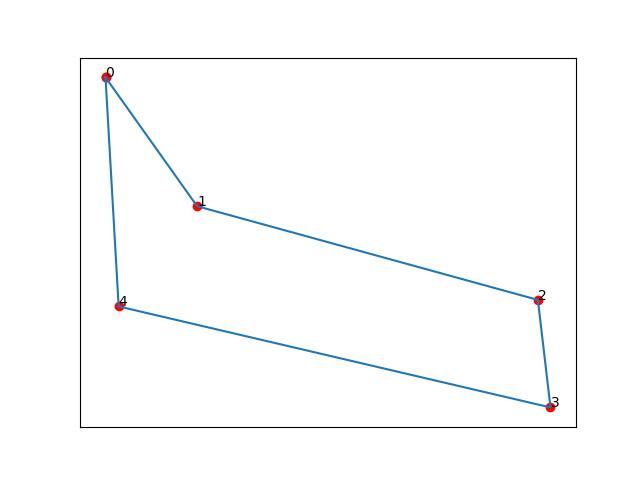

This had length 7071.844989.


In [11]:
(path, distance) = bruteForce(A[:5])

plot(path, labelPoints=True)

print('This had length %f.' % distance)

---
## Question 7
Not too much to this one, but notice the rapid growth!

In [12]:
for i in range(1,12):
    print('\nRunning for the first %d cities:' % i)
    %time bruteForce(A[:i])


Running for the first 1 cities:
CPU times: user 42 µs, sys: 28 µs, total: 70 µs
Wall time: 77.5 µs

Running for the first 2 cities:
CPU times: user 75 µs, sys: 0 ns, total: 75 µs
Wall time: 81.1 µs

Running for the first 3 cities:
CPU times: user 151 µs, sys: 0 ns, total: 151 µs
Wall time: 158 µs

Running for the first 4 cities:
CPU times: user 423 µs, sys: 0 ns, total: 423 µs
Wall time: 433 µs

Running for the first 5 cities:
CPU times: user 2.38 ms, sys: 0 ns, total: 2.38 ms
Wall time: 2.39 ms

Running for the first 6 cities:
CPU times: user 11.7 ms, sys: 1.77 ms, total: 13.5 ms
Wall time: 13.6 ms

Running for the first 7 cities:
CPU times: user 64.5 ms, sys: 9 µs, total: 64.5 ms
Wall time: 65.8 ms

Running for the first 8 cities:
CPU times: user 516 ms, sys: 0 ns, total: 516 ms
Wall time: 516 ms

Running for the first 9 cities:
CPU times: user 5.34 s, sys: 0 ns, total: 5.34 s
Wall time: 5.34 s

Running for the first 10 cities:
CPU times: user 60 s, sys: 1.67 ms, total: 60 s
Wall ti

<IPython.core.display.Javascript object>


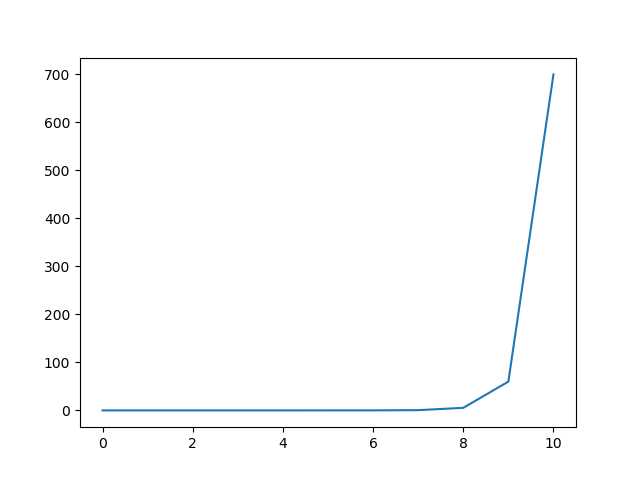

In [13]:
# Just for fun, plot the trend
times = [76*10**-6, 81*10**-6, 158*10**-6, 433*10**-6, 2.39*10**-3, 13.6*10**-3, 65.8*10**-3, 516*10**-3, 5.34, 60, 11.67*60]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(times)
plt.show()

---
## Question 8
There are many approaches one can take to this problem. You were graded on how well you came up with (or found) and implemented your solution.

I have also done a deep dive into the methods you all used and will release that at a later date.

---
## Question 9
You were responsible for doing a full writeup. There were many ways to go about it, but I actually wrote a solution to this already using some simple data structures to streamline the code.

You can find my solution in the [Intermediate Optimization Solutions](./Intermediate-Optimization-solutions.ipynb) notebook in this repository.